In [2]:
import numpy as np
import matplotlib.pyplot as plt

from fourier_utils import fourier_transform_point_function, inverse_transform, Complex

TypeError: unsupported operand type(s) for *: 'Complex' and 'complex'

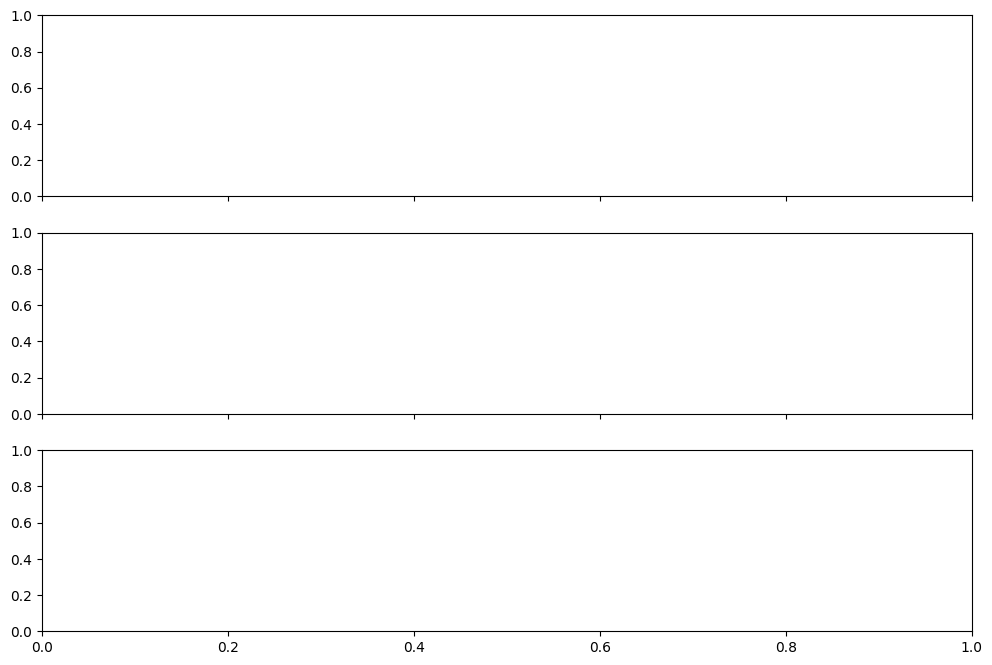

In [3]:
fig, ax = plt.subplots(3, figsize=[12,8], sharex=True)

# adjust the main plot to make room for the sliders
xs = np.linspace(0, 2*np.pi, 1000)
N = 10
m = 4

init_r, init_theta = 5.0, np.pi/2
offset_theta = 1/N*m # shift has to be k-dependent or you are mixing groups

# Plot the original function
z_orig = Complex(init_r, init_theta)
z_hat_orig = fourier_transform_point_function(z_orig, N)
z_hat_hat_orig = inverse_transform(z_hat_orig)

ax[0].plot(xs, z_hat_hat_orig(xs))
ax[0].set_ylabel('Original')

# Perform the shift in the original domain.

z_shift_in = Complex(init_r, init_theta + offset_theta)
z_hat_shift_in = fourier_transform_point_function(z_shift_in, N)
z_hat_hat_in = inverse_transform(z_hat_shift_in)

ax[1].plot(xs, z_hat_hat_in(xs))
ax[1].set_ylabel('Argument shifted: \n original domain')

# Perform the shift in the dual domain.
z_hat_shifted_out = z_hat_orig.copy()
shifter = np.exp(-1j*offset_theta*z_hat_shifted_out[:, 0]) # Where does this 2 come from??
z_hat_shifted_out[:, 1] *= shifter

z_hat_hat_shifted_out = inverse_transform(z_hat_shifted_out)
ax[2].plot(xs, z_hat_hat_shifted_out(xs))
ax[2].set_ylabel('Argument shifted: \n dual domain')

### Product View of Integral Transforms

In [100]:
def k(x, n):
    return np.cos(x*n*2*np.pi)

def f(x):
    return np.cos(3*x*np.pi*2) + np.cos(2*x*np.pi*2)

def pf(x, n):
    return f(x)


In [126]:
xs  = np.linspace(0, 1, 1000)
ns = np.arange(0, 20)

xx, nn = np.meshgrid(xs, ns)

In [127]:
kk = k(-xx, nn)
ff = pf(xx, nn)

conv = kk*ff

In [128]:
kk[0, :].shape

(1000,)

In [129]:
kk.shape

(20, 1000)

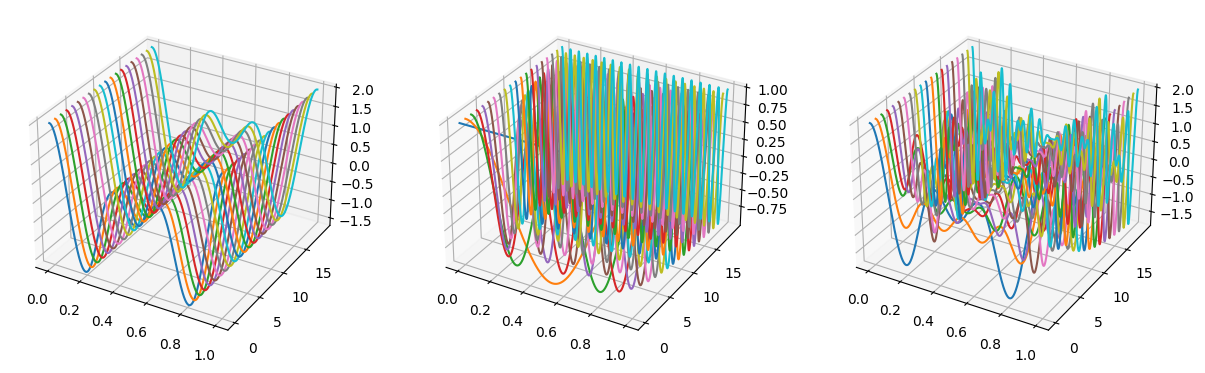

In [130]:
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=[15, 6])

for n in ns:
    ax[0].plot(xx[n, :], nn[n, :], zs=ff[n, :])
    ax[1].plot(xx[n, :], nn[n, :], zs=kk[n, :])
    ax[2].plot(xx[n, :], nn[n, :], zs=conv[n, :])

In [131]:
#integrate over the coordinate lines of X in the product to obtain the fourier transform
f_hat = conv.sum(axis=1)/500

<BarContainer object of 20 artists>

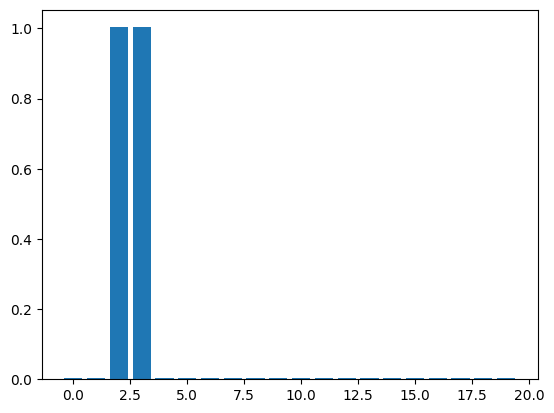

In [132]:
idx = np.arange(0, len(f_hat))
plt.bar(idx, f_hat)

In [133]:
def plot_convolution(k):
    fig, ax = plt.subplots(1, 3, figsize=[15,4])
    ax[0].plot(xs, kk[k, :])
    ax[1].plot(xs, ff[k, :])
    ax[2].plot(xs, conv[k, :])

    ax[0].set_title('kernel')
    ax[1].set_title('function')
    ax[2].set_title('convolution')

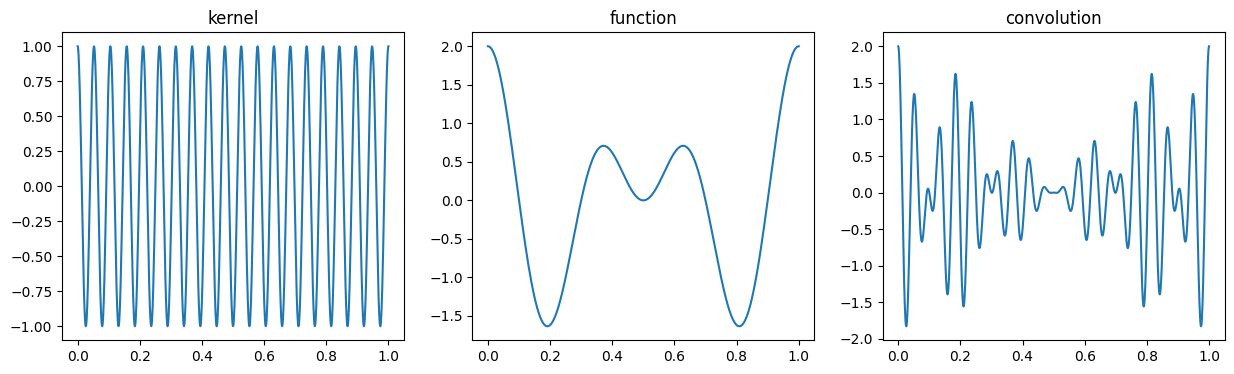

In [136]:
plot_convolution(19)